In [1]:
# from flask import Flask, request, jsonify
import os
import random
import requests
import matplotlib.pyplot as plt
import numpy as np
import joblib
import json
from PIL import Image


In [2]:
# Load model and label mapping
model = joblib.load('models/best_random_forest_model_more_data_2023-11-16_1527.pkl')
with open('models/random_forest_labels_to_idx_more_data.json', 'r') as f:
    label_to_idx = json.load(f)
    idx_to_label = {v: k for k, v in label_to_idx.items()}

In [3]:
folder_path = 'auto_sorted_data/'  # Replace with your image folder path
subfolders = [sf for sf in os.listdir(folder_path) if sf != '.DS_Store']
# [os.listdir(f) for f in [f'{folder_path}{subfolder}' for subfolder in subfolders]][0]
filepaths = []
for subfolder in subfolders: 
    files = os.listdir((f'{folder_path}{subfolder}'))
    for f in files:
        filepaths.append(f'{folder_path}{subfolder}/{f}')
# filepaths

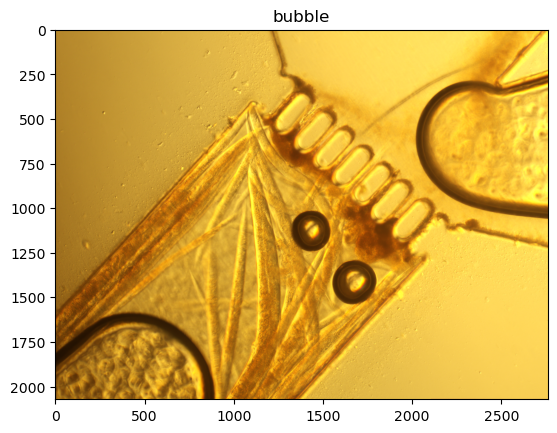

In [4]:
# image_files = [f for f in os.listdir(f'{folder_path}/{subfolder}') if f.endswith('.tif')]  # Adjust file type if necessary
# selected_image = random.choice(image_files)
# image_path = os.path.join(folder_path, selected_image)
image_path = random.choice(filepaths)
plot_title =  os.path.basename(os.path.dirname(image_path))

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.title(plot_title)
plt.show()


In [6]:
# def convert_to_image(np_image):
#     # np_image = np.array(image_list)
#     print(np_image.shape)
#     if len(np_image.shape) == 2:  # Grayscale image
#         return Image.fromarray(np_image, 'L')
#     elif len(np_image.shape) == 3 and np_image.shape[2] == 3:  # RGB image
#         return Image.fromarray(np_image, 'RGB')
#     else:
#         # raise ValueError("Unsupported image format")
#         return np_image.shape

In [5]:
np_image = np.array(img)  # Convert the PIL Image to a numpy array
image_data = np_image.tolist()  # Convert the numpy array to a list
image_shape = np_image.shape  # Get the shape of the numpy array
np_image.shape

(2072, 2760, 3)

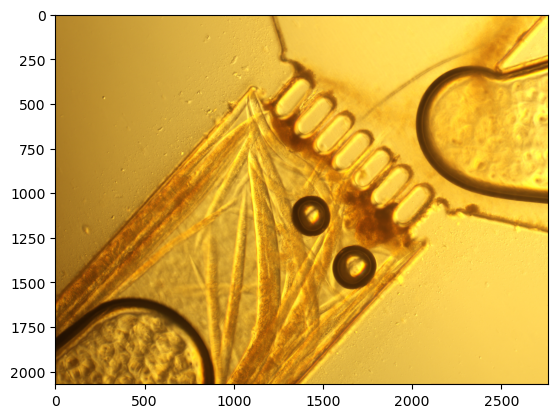

In [6]:
new_img = Image.fromarray((np_image))
plt.imshow(new_img)

In [13]:
new_np_image = np.array(image_data).astype(np.uint8)
recreated_np_image = new_np_image.reshape(image_shape)
recreated_np_image.shape

(2072, 2760, 3)

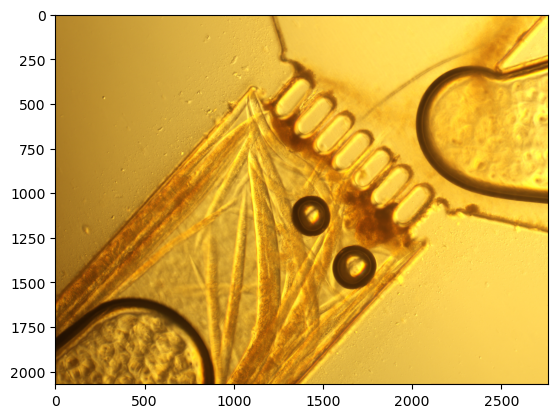

In [15]:
recreated_img = Image.fromarray((recreated_np_image))
plt.imshow(recreated_img)
# recreated_img.shape

In [19]:
request_data = {}
request_data['image_data'] = image_data
request_data['image_shape'] = image_shape

In [20]:
request_data.keys()

dict_keys(['image_data', 'image_shape'])

In [46]:
preprocess_image_size = (128,128)

def preprocess_image(np_image, size=preprocess_image_size):
    """Load an image, resize, and flatten it."""
    # image = Image.open(image_path)
    image = Image.fromarray(np_image)    
    image = image.resize(size)
    if image.mode != 'L':
        image = image.convert('L')
    np_image = np.array(image).flatten()
    return np_image
    # return image

In [54]:
processed_image = preprocess_image(np_image)
# plt.imshow(np_image, cmap='gray')
model.predict(processed_image.reshape(1,-1))[0]

0

In [59]:
def predict(request_data):
    image_data = request_data['image_data']
    image_shape = request_data['image_shape']
    print(image_shape)
    np_image = np.array(image_data).astype(np.uint8).reshape(image_shape)
    print(np_image.shape)
    img = Image.fromarray(np_image)
    # img = convert_to_image(np_image)
    processed_image = preprocess_image(np_image)
    prediction = model.predict(processed_image.reshape(1,-1))[0]
    # return plt.imshow(img)
    # return processed_image.shape
    return idx_to_label[prediction]

In [60]:
predict(request_data)

(2072, 2760, 3)
(2072, 2760, 3)


'bubble'

In [72]:

# Send the image to the predictor
# url = 'http://localhost:5000/predict'  # URL where the Flask app is running
url = 'http://127.0.0.1:5000/predict'  # URL where the Flask app is running
# response = requests.post(url, json={'image_data': image_data})
# Send the image data and shape in the POST request
response = requests.post(url, json={'image_data': image_data, 'image_shape': image_shape})
response.status_code

200

In [73]:

# Check the response
if response.status_code == 200:
    prediction = response.json()['prediction']
    # print(f"Prediction: {'Image matches \'enough\' class' if prediction == 1 else 'Image does not match \'enough\' class'}")
    print(prediction)
elif response.status_code == 400:
    print("Error:", response.json())
else:
    print("Error in prediction request")


0


0
not_enough


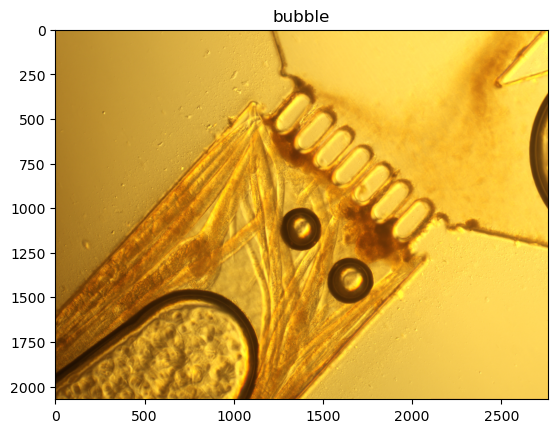

0
not_enough


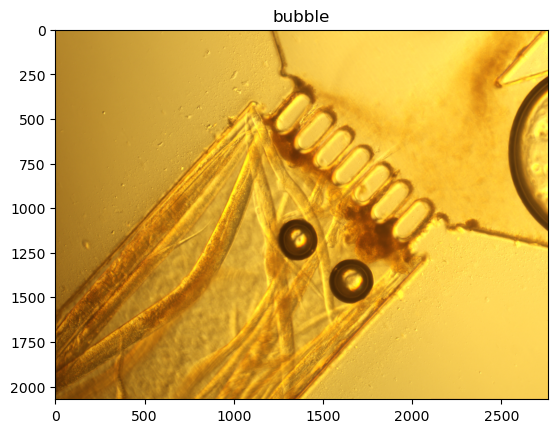

0
not_enough


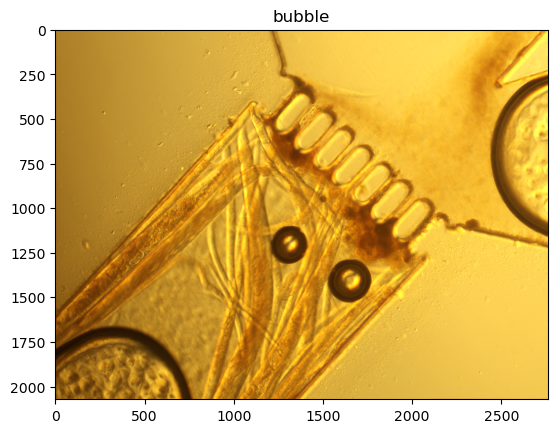

0
not_enough


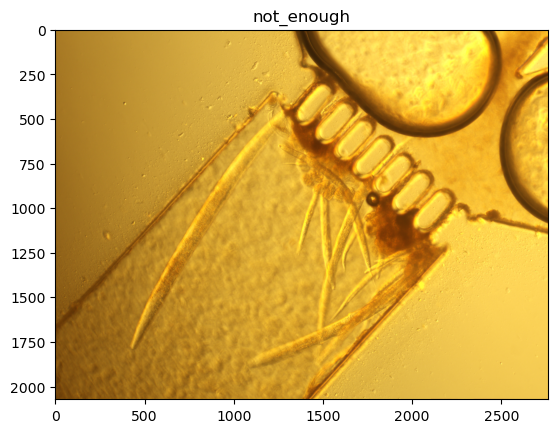

0
not_enough


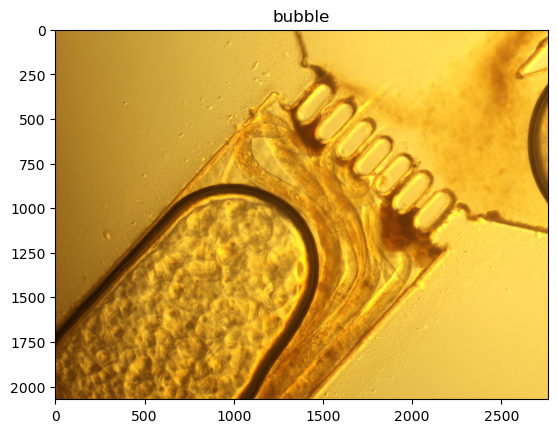

0
not_enough


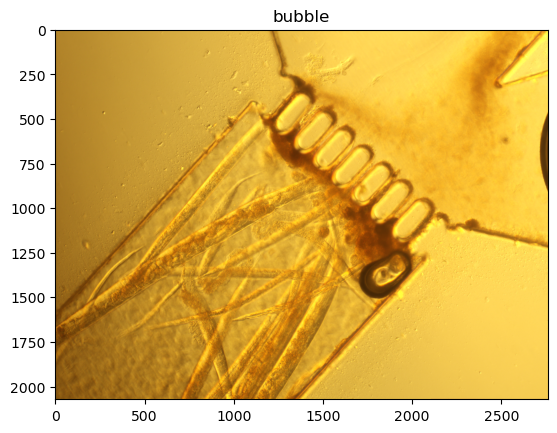

0
not_enough


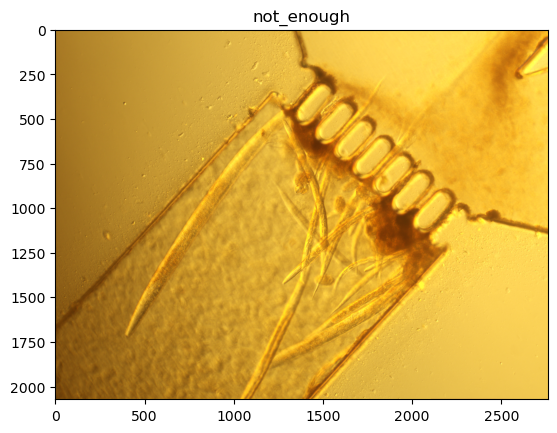

0
not_enough


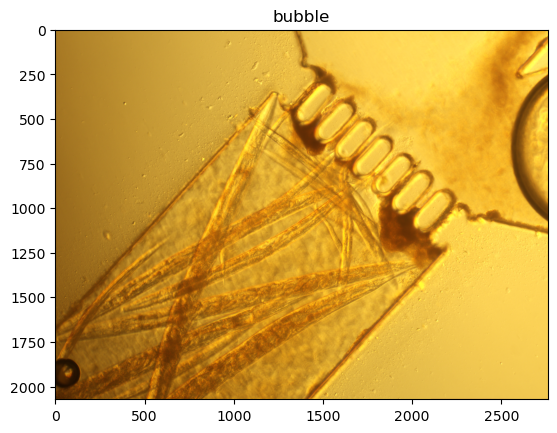

0
not_enough


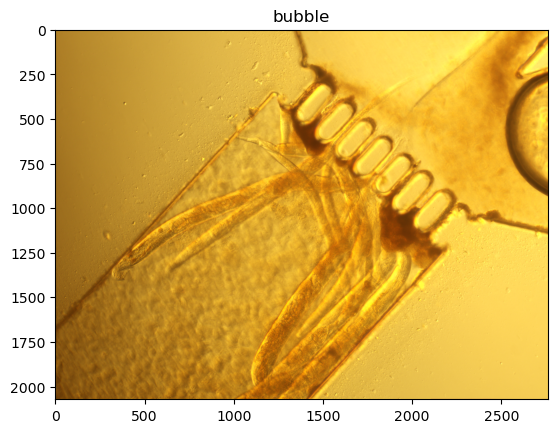

0
not_enough


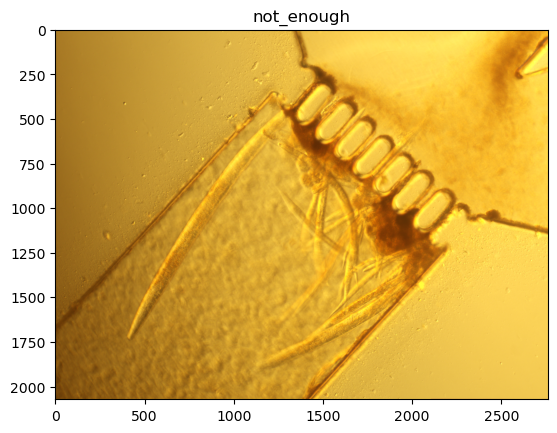

In [88]:
for i in range(10):

    image_path = random.choice(filepaths)
    plot_title =  os.path.basename(os.path.dirname(image_path))
    
    # Display the image
    img = Image.open(image_path)

    
    np_image = np.array(img)  # Convert the PIL Image to a numpy array
    image_data = np_image.tolist()  # Convert the numpy array to a list
    image_shape = np_image.shape  # Get the shape of the numpy array
    response = requests.post(url, json={'image_data': image_data, 'image_shape': image_shape})
    # print(response.status_code)
    print(response.json()['prediction'])
    if response.json()['prediction'] == 1:
        print('enough')
    else:
        print('not_enough')
    
    plt.imshow(img)
    plt.title(plot_title)
    plt.show()